In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
data=pd.read_csv("Dataset Salary 2024.csv")

In [46]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [47]:
data.shape

(16534, 11)

In [48]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [50]:
data.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [51]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


##### 1. To find the mean of a selected column:

In [52]:
print("Mean Salary:",data["salary"].mean())
print("Mean Salary(in USD):", data["salary_in_usd"].mean())

Mean Salary: 163726.96268295633
Mean Salary(in USD): 149686.77797266238


##### 2. To find the mean of those with experience level of Entry level(EN)

In [53]:
data["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [54]:
sum=0
count=0
for idx,row in data.iterrows():
    if row["experience_level"]=="EN":
        sum+=row["salary_in_usd"]
        count+=1
average=sum/count
print("Average salary of entry level employees is:",average)

Average salary of entry level employees is: 92327.41358490566


In [55]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##### From above we can see that we do not have any NaN values

In [56]:
data.duplicated().sum()

np.int64(6421)

## DATA VISUALIZATION

> Using seaborn and matplorlib for this section

<Axes: ylabel='salary_in_usd'>

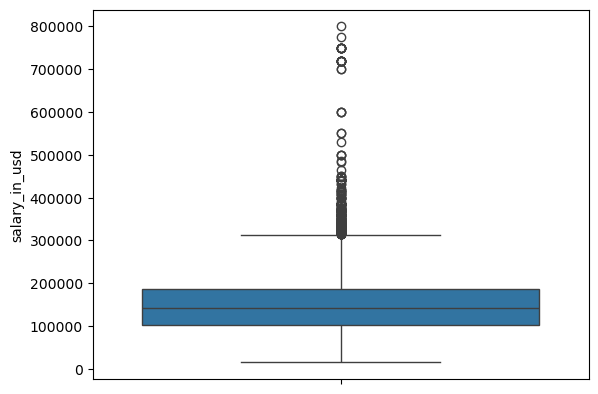

In [57]:
sns.boxplot(data["salary_in_usd"])

> Box plots are generally used to find outliers. The above plot shows a large number of outliers.
> There are different ways to handle the outliers:
> 1. Trimming (Using max, min value or Z score)
> 2. Capping (When there are large number of outliers, we cannot remove then insetad we replace the min value wity min value and max value with max)

> We are not removing any outliers here. We are leaving the data as is.

<Axes: ylabel='work_year'>

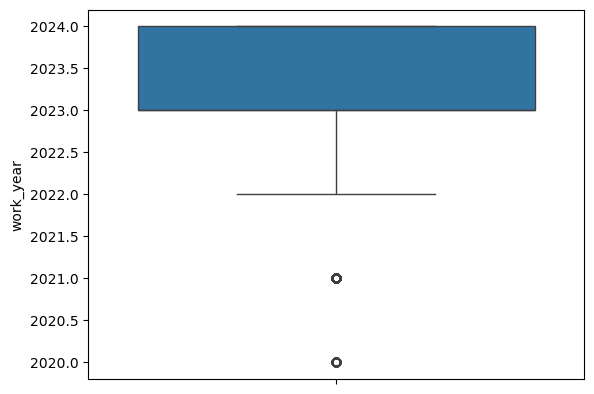

In [43]:
sns.boxplot(data["work_year"])

<Axes: xlabel='work_year', ylabel='Count'>

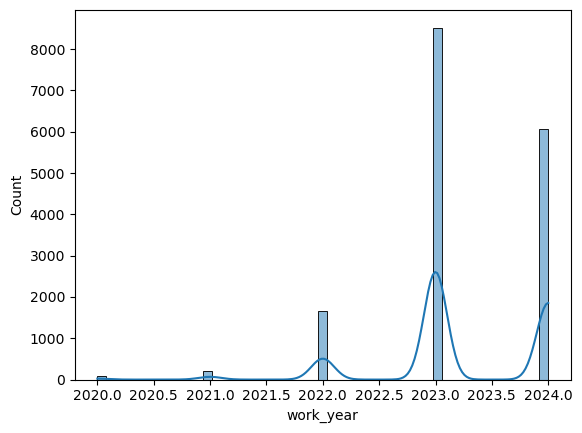

In [65]:
sns.histplot(data["work_year"],kde=True)

> Different ways of plotting a bar graph

<Axes: xlabel='experience_level', ylabel='count'>

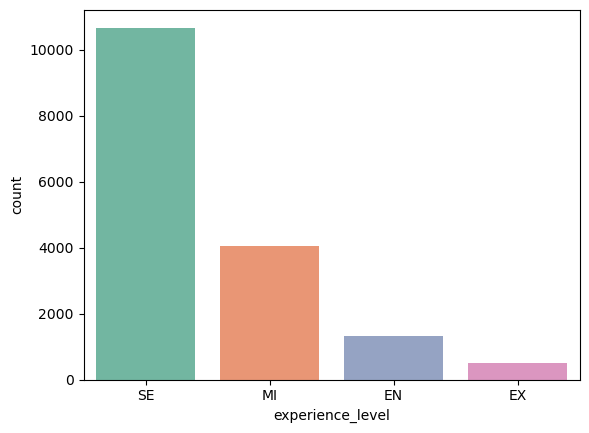

In [67]:
sns.countplot(data=data,x="experience_level",hue="experience_level",palette="Set2")

<Axes: xlabel='experience_level'>

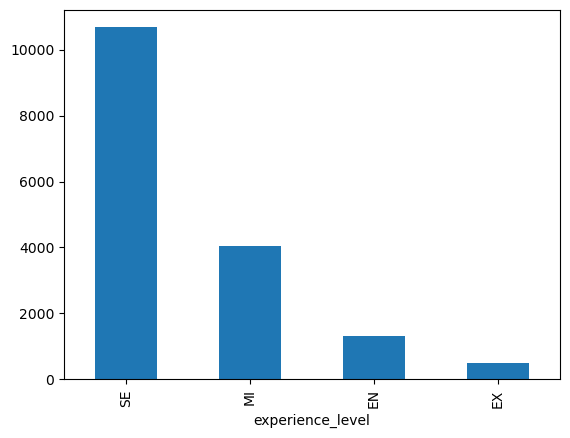

In [69]:
data["experience_level"].value_counts().plot(kind="bar")

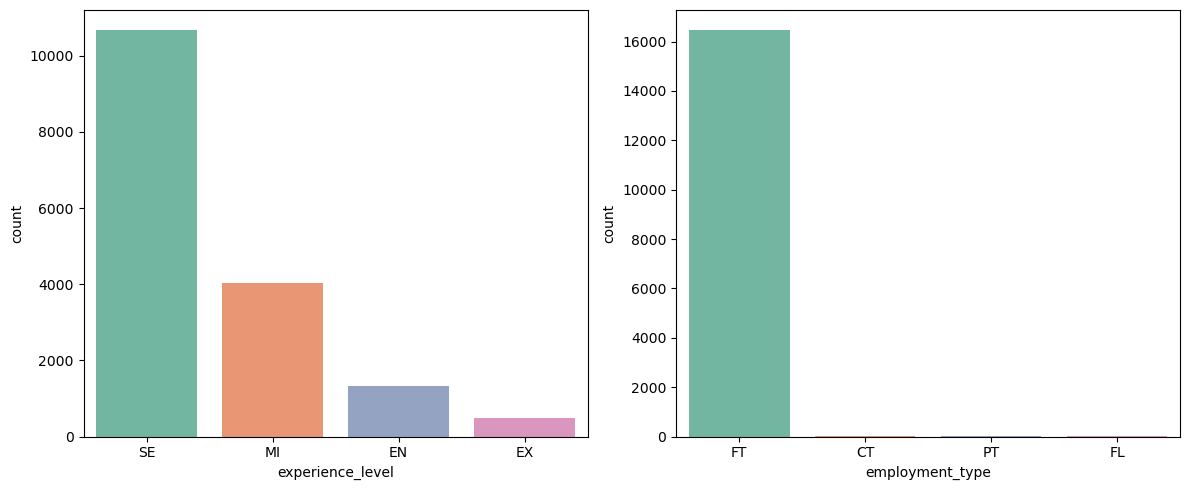

In [92]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.countplot(data=data,x="experience_level",hue="experience_level",palette="Set2")
plt.subplot(1,2,2)
sns.countplot(data=data,x="employment_type",hue="employment_type",palette="Set2")
plt.tight_layout()
plt.show()

<Axes: xlabel='experience_level', ylabel='count'>

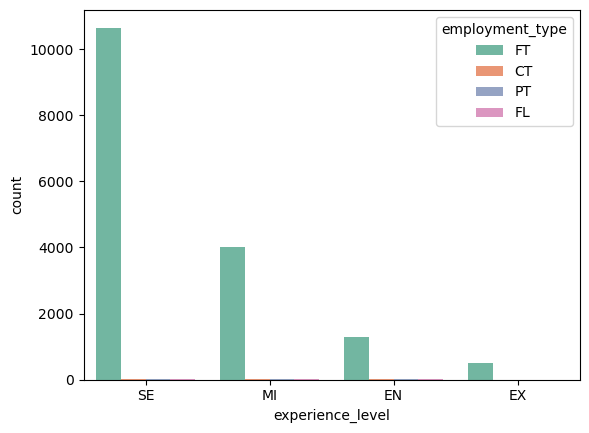

In [85]:
sns.countplot(data=data,x="experience_level",hue="employment_type",palette="Set2")

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

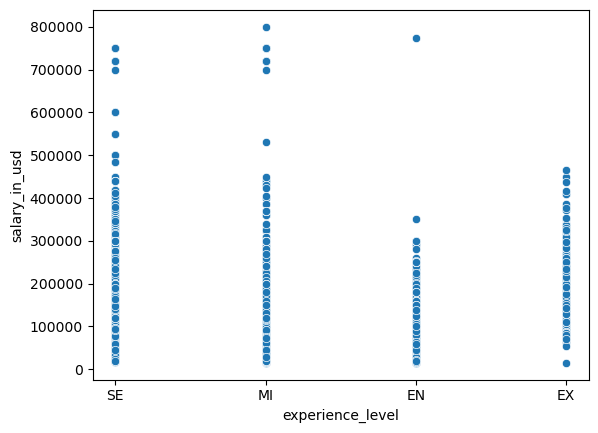

In [98]:
sns.scatterplot(data=data,x="experience_level",y="salary_in_usd")

In [103]:
corr=data.corr(numeric_only=True)

<Axes: >

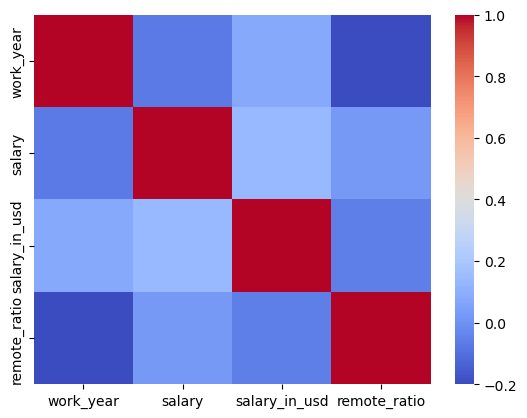

In [104]:
sns.heatmap(corr,cmap="coolwarm")

<Axes: ylabel='count'>

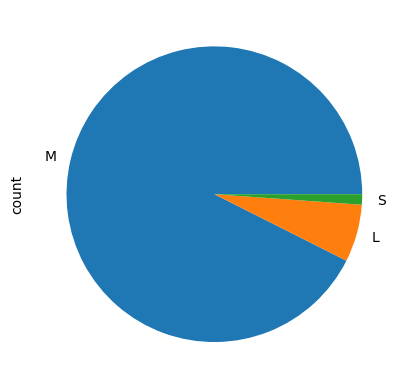

In [107]:
data["company_size"].value_counts().plot(kind="pie")